This notebook will implement the genetic algorithm optimization technique in Python based on a simple example in which we are trying to maximize the output of an equation. 
Y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6

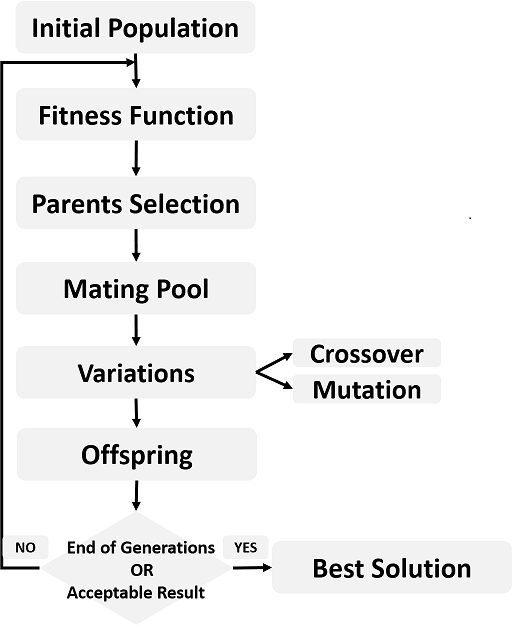

The equation has 6 inputs (x1 to x6) and 6 weights (w1 to w6) as shown and inputs values are (x1,x2,x3,x4,x5,x6)=(4,-2,7,5,11,1). We are looking to find the parameters (weights) that maximize such equation. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cd='/content/drive/My Drive/Colab Notebooks/'
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
 # Inputs of the equation x.
 equation_inputs = [4,-2,3.5,5,-11,-4.7]
 # Number of the weights we are looking to optimize.
 num_weights = 6

In [ ]:
import numpy
sol_per_pop = 8
# Defining the population size.

pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.

#Creating the initial population.

new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)

After preparing the population, based on the fitness function, we are going to select the best individuals within the current population as parents for mating. Next is to apply the GA variants (crossover and mutation) to produce the offspring of the next generation, creating the new population by appending both parents and offspring, and repeating such steps for a number of iterations/generations.

In [ ]:
import ga
num_generations = 5

num_parents_mating = 4
for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
     fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    # Selecting the best parents in the population for mating.
     parents = ga.select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
 
     # Generating next generation using crossover.
     offspring_crossover = ga.crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], num_weights))
 
     # Adding some variations to the offsrping using mutation.
     offspring_mutation = ga.mutation(offspring_crossover)
     # Creating the new population based on the parents and offspring.
     new_population[0:parents.shape[0], :] = parents
     new_population[parents.shape[0]:, :] = offspring_mutation
     # The best result in the current iteration.
     print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

Best result :  25.474783588460575
Best result :  42.033872614045805
Best result :  47.48252729845371
Best result :  47.51264527051264
Best result :  47.51264527051264


In [ ]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Best solution :  [[[ 2.4358166  -0.59713517  0.58295287 -2.01587543 -2.46038836
   -3.73401674]]]
Best solution fitness :  [47.51264527]
